Reservoir adjacency matrix initialized. Beginning spectral radius scaling.
The largest eigenvalue of this matrix was: 4.248286293593137
Reservoir spectral radius scaled to: 1.2499999999933713
Reservoir weights spectral radius scaling completed.


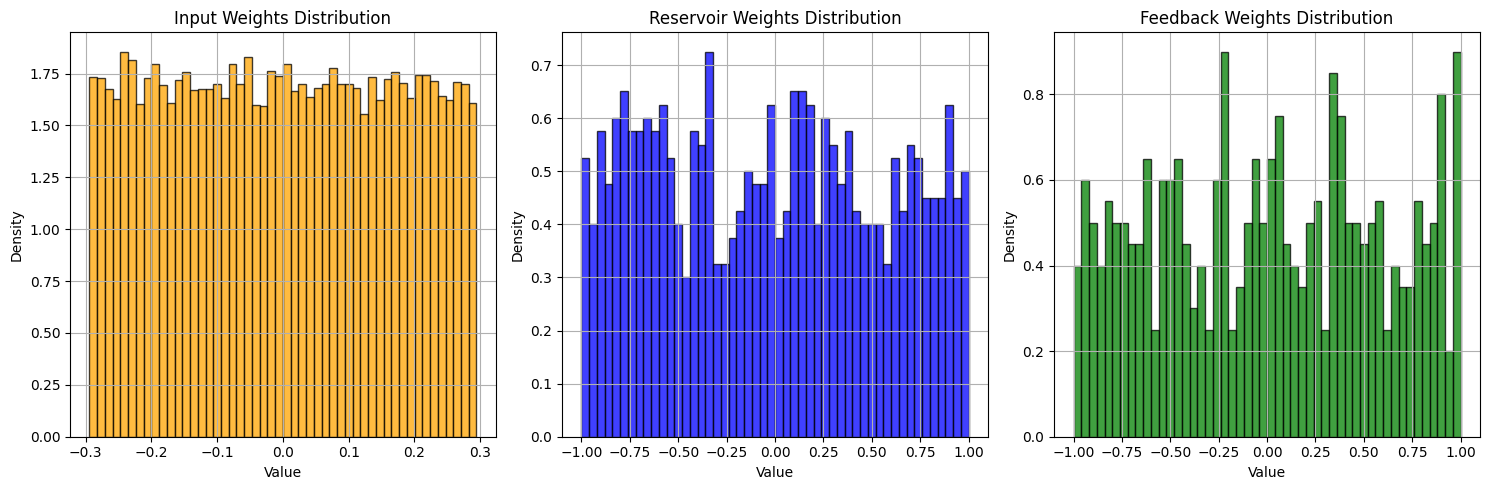


=== Matrix Shapes ===
Matrix         Shape               
-----------------------------------
W_res          (500, 500)          
W_in           (500, 2)            
W_fb           (500, 1)            
Reservoir Adjacency Matrix is of type <class 'scipy.sparse._csr.csr_matrix'> with shape (500, 500)
Network matrices uploaded to /home/dafydd/PycharmProjects/py-ESN-software-testing/Generated_Weights


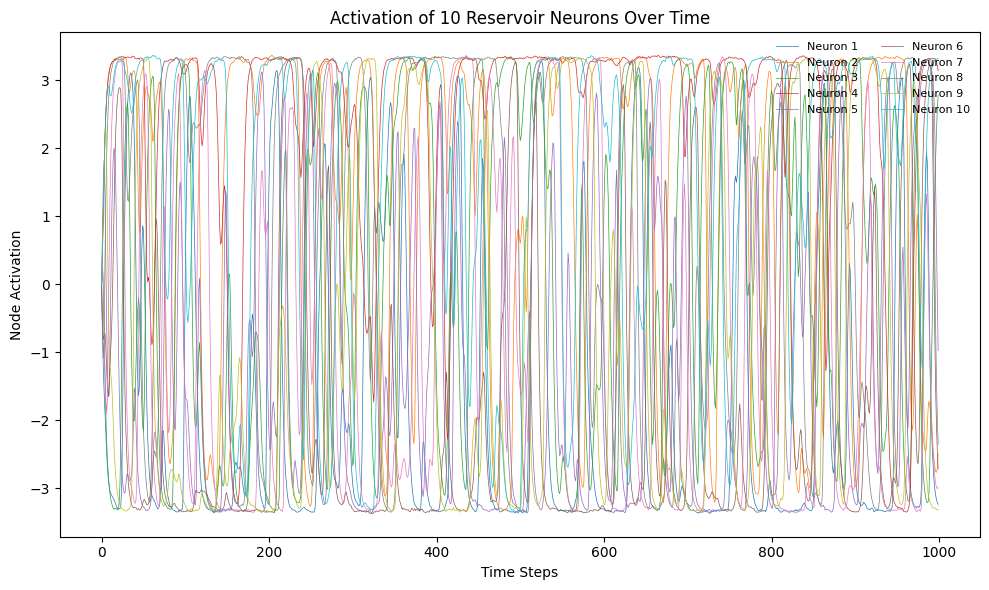

XX^T has shape: (502, 502)
YX^T has shape: (1, 502)
Readout weight matrix shape: (1, 502)


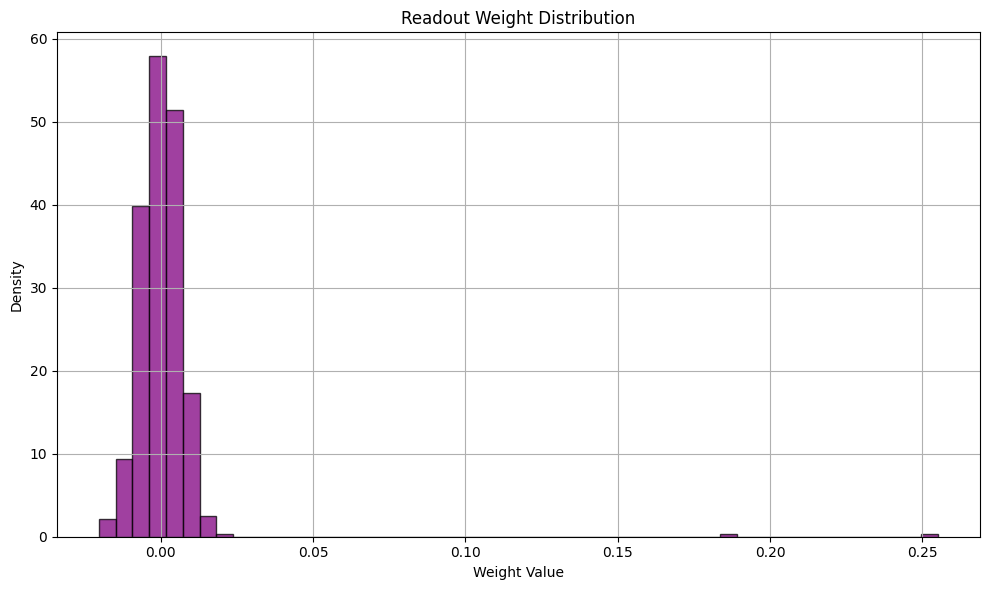

Readout weights saved to /home/dafydd/PycharmProjects/py-ESN-software-testing/Generated_Weights
Mean squared error between predictions and targets: 0.00414
Readout matrix test passed.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ESN_class_main import EchoStateNetwork

# Test Parameters
timesteps = 1000
input_dim = 1
output_dim = 1
reservoir_size = 500
ridge_param = 1e-2

# Generate synthetic data
np.random.seed(42)
time = np.linspace(0, 10, timesteps)
inputs = np.sin(time).reshape(1, -1)  # Sine wave input
targets = (0.5 * np.sin(time + np.pi / 4)).reshape(1, -1)  # Shifted and scaled sine wave

# ESN Parameters
ESN_params = {
    'input_dim': input_dim,
    'output_dim': output_dim,
    'nodes': reservoir_size,
    'leak': 0.3,
    'connectivity': 0.1,
    'input_scaling': np.array([0.5]),
    'spectral_radius': 1.25,
    'noise': 0.01,
    'enable_feedback': True,
    'teacher_scaling': np.array([1.0]),
    'bias': True,
    'seed': 42,
}

# Initialize the ESN
esn = EchoStateNetwork(ESN_params, verbose=3)

# Initialize Reservoir
# esn.initialize_reservoir(distribution="normal")
esn.initialize_reservoir(distribution="uniform")

# Acquire States
states = esn.acquire_reservoir_states(inputs=inputs, teachers=targets, visualized_neurons=10)

# Perform Regression
readout_weights = esn.tikhonov_regression(burn_in=0, ridge=ridge_param)

# Validate Predictions
if esn.bias:
    augmented_state = np.vstack([np.ones((1, timesteps)), inputs, states])
else:
    augmented_state = np.vstack([inputs, states])

# Perform prediction
predicted_outputs = readout_weights @ augmented_state
prediction_error = np.mean((predicted_outputs - targets)**2)

print(f"Mean squared error between predictions and targets: {prediction_error:.5f}")

# # Save W_out if desired
# output_dir = "Generated_Weights"
# os.makedirs(output_dir, exist_ok=True)
# pd.DataFrame(readout_weights).to_csv(f"{output_dir}/W_out-{timestamp}.csv", index=False, header=False)

assert readout_weights.shape == (output_dim, int(ESN_params['bias']) + input_dim + reservoir_size), "W_out shape mismatch!"
print("Readout matrix test passed.")
# print(esn.W_out)

In [2]:
# import numpy as np
# from ESN_class_main import EchoStateNetwork
# 
# # Test Parameters
# ESN_params = {
#     "input_dim": 1,  # Number of inputs
#     "nodes": 500,  # Reservoir size
#     "output_dim": 1,  # Number of outputs
#     "ridge": 0.1,  # Ridge penalty
#     "leak": 0.3,  # Leaking rate
#     "connectivity": 0.1,  # Reservoir sparsity
#     "input_scaling": np.array([1.0]),  # Scaling for each input feature
#     "spectral_radius": 0.9,  # Desired spectral radius
#     "enable_feedback": True,  # Enable or disable feedback
#     "teacher_scaling": np.array([0.8]),  # Scaling for feedback
#     "bias": True,  # Include bias
#     "seed": 42,  # Random seed
#     "noise": 0.01
# }
# timesteps = 1000
# input_series = np.sin(np.linspace(0, 10 * np.pi, timesteps)).reshape(1, -1)
# print(f"Input series shape: {input_series.shape}")
# teacher_series = 0.5 * np.cos(np.linspace(0, 10 * np.pi, timesteps)).reshape(1, -1)
# print(f"Teacher series shape: {teacher_series.shape}")
# 
# # Create ESN Instance
# esn = EchoStateNetwork(ESN_params, verbose=3)
# 
# # Test Weight Initialization
# print("=== Weight Initialization Test ===")
# esn.initialize_reservoir(distribution="uniform")
# assert esn.W_res.shape == (ESN_params["nodes"], ESN_params["nodes"]), "Incorrect reservoir matrix shape"
# assert esn.W_in.shape == (ESN_params["nodes"], ESN_params["input_dim"] + ESN_params["bias"]), "Incorrect input matrix shape"
# if ESN_params["enable_feedback"]:
#     assert esn.W_fb.shape == (ESN_params["nodes"], ESN_params["output_dim"]), "Incorrect feedback matrix shape"
# print("Weight initialization test passed.\n")
# 
# # Test State Acquisition
# print("=== State Acquisition Test ===")
# states = esn.acquire_reservoir_states(input_series, teachers=teacher_series, visualized_neurons=5)
# assert states.shape == (ESN_params["nodes"], timesteps), "Incorrect state matrix shape"
# print("State acquisition test passed.\n")
# 
# # Test XX^T and YX^T Updates
# print("=== XX^T and YX^T Updates Test ===")
# expected_dim = 1 + ESN_params["input_dim"] + ESN_params["nodes"]  # Bias + Inputs + Nodes
# assert esn.XX_T.shape == (expected_dim, expected_dim), "Incorrect XX^T matrix shape"
# assert esn.YX_T.shape == (ESN_params["output_dim"], expected_dim), "Incorrect YX^T matrix shape"
# print("Matrix updates test passed.\n")
# 
# # Test Noise Injection
# print("=== Noise Injection Test ===")
# noisy_states = esn._update_no_feedback(states[:, 0:1], input_series[:, 0:1])  # Single update
# assert noisy_states.shape == (ESN_params["nodes"],), "Incorrect noisy state shape"
# print("Noise injection test passed.\n")
# 
# # Final State Check
# print("=== Final State Check ===")
# print("Reservoir states shape:", states.shape)
# print("XX^T shape:", esn.XX_T.shape)
# print("YX^T shape:", esn.YX_T.shape)